# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

## CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

## Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Problem
From a data problem perspective, this task requires exploratory data analysis and predictive modeling strategies to identify key factors that might influence used car prices.

The target variable for this problem will be the car price, and I will be analyzing potential predictor variables from the dataset.

This analysis will involve data preprocessing, feature engineering and statistical modeling to determine patterns and correlations.

Machine learning regression techniques will be used to build a price prediction model and data visualization will be used to help interpret consumer preferences.

## Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### First I'll load in and inspect the dataset

In [1]:
# import libraries

import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read in the dataset

cars_df = pd.read_csv('data/vehicles.csv')

In [5]:
# preview first 10 rows of data

cars_df.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


Right off the back there appears to be a lot of missing values for multiple columns

### Next I'll check the data types for each column and identify duplicates or missing values

In [7]:
# summarize columns and data types

cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

I notice that the year column is a float instead of an integer, this should be converted

In [9]:
# convert columns into more useful data types

cars_df = cars_df.convert_dtypes()
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            426880 non-null  Int64 
 1   region        426880 non-null  string
 2   price         426880 non-null  Int64 
 3   year          425675 non-null  Int64 
 4   manufacturer  409234 non-null  string
 5   model         421603 non-null  string
 6   condition     252776 non-null  string
 7   cylinders     249202 non-null  string
 8   fuel          423867 non-null  string
 9   odometer      422480 non-null  Int64 
 10  title_status  418638 non-null  string
 11  transmission  424324 non-null  string
 12  VIN           265838 non-null  string
 13  drive         296313 non-null  string
 14  size          120519 non-null  string
 15  type          334022 non-null  string
 16  paint_color   296677 non-null  string
 17  state         426880 non-null  string
dtypes: Int64(4), string(14)


In [11]:
# run the describe function on data to evaluate the numerical columns

cars_df.describe()

,id,price,year,odometer
count,426880.0,426880.0,425675.0,422480.0
mean,7311486634.224333,75199.033187,2011.235191,98043.331443
std,4473170.412559,12182282.173598,9.45212,213881.500798
min,7207408119.0,0.0,1900.0,0.0
25%,7308143339.25,5900.0,2008.0,37704.0
50%,7312620821.0,13950.0,2013.0,85548.0
75%,7315253543.5,26485.75,2017.0,133542.5
max,7317101084.0,3736928711.0,2022.0,10000000.0


In [13]:
# run a similar analysis for non-numerical columns

cars_df.describe(include=['string'])

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,50614


In [15]:
# check size of df before removing duplicates

print("Before removing duplicates:", cars_df.shape)

Before removing duplicates: (426880, 18)


In [17]:
# remove duplicates and check df size again

cars_df = cars_df.drop_duplicates()
print("After removing duplicates:", cars_df.shape)

After removing duplicates: (426880, 18)


There appears to be no duplicate items

In [19]:
# check for missing values

missing_counts = cars_df.isnull().sum().sort_values()
print(missing_counts)

id                   0
price                0
state                0
region               0
year              1205
transmission      2556
fuel              3013
odometer          4400
model             5277
title_status      8242
manufacturer     17646
type             92858
paint_color     130203
drive           130567
VIN             161042
condition       174104
cylinders       177678
size            306361
dtype: int64


As suspected above, there are multiple columns with over 40% missing data. This may mean they will be unreliable for analysis.

In [21]:
# investigate the number of records with values 0 in the data set

cars_df.eq(0).sum()

id                  0
region              0
price           32895
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer         1965
title_status        0
transmission        0
VIN                 0
drive               0
size                0
type                0
paint_color         0
state               0
dtype: Int64

Seems like the price and odometer columns have many 0 values that might skew the data

### I then use various plotting techniques to identify outliers and detech any potential data entry errors

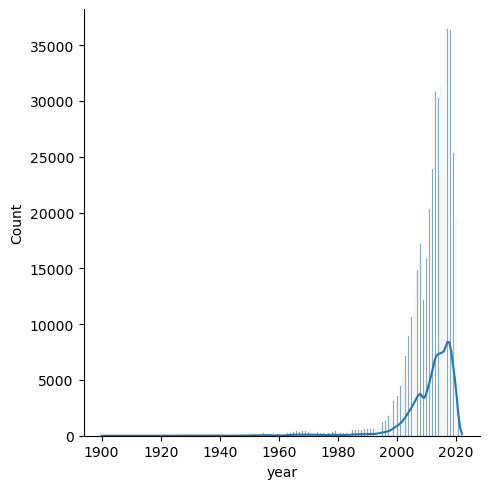

In [23]:
# histogram with kde plot of car years
sns.displot(data=cars_df, x="year", kde=True)

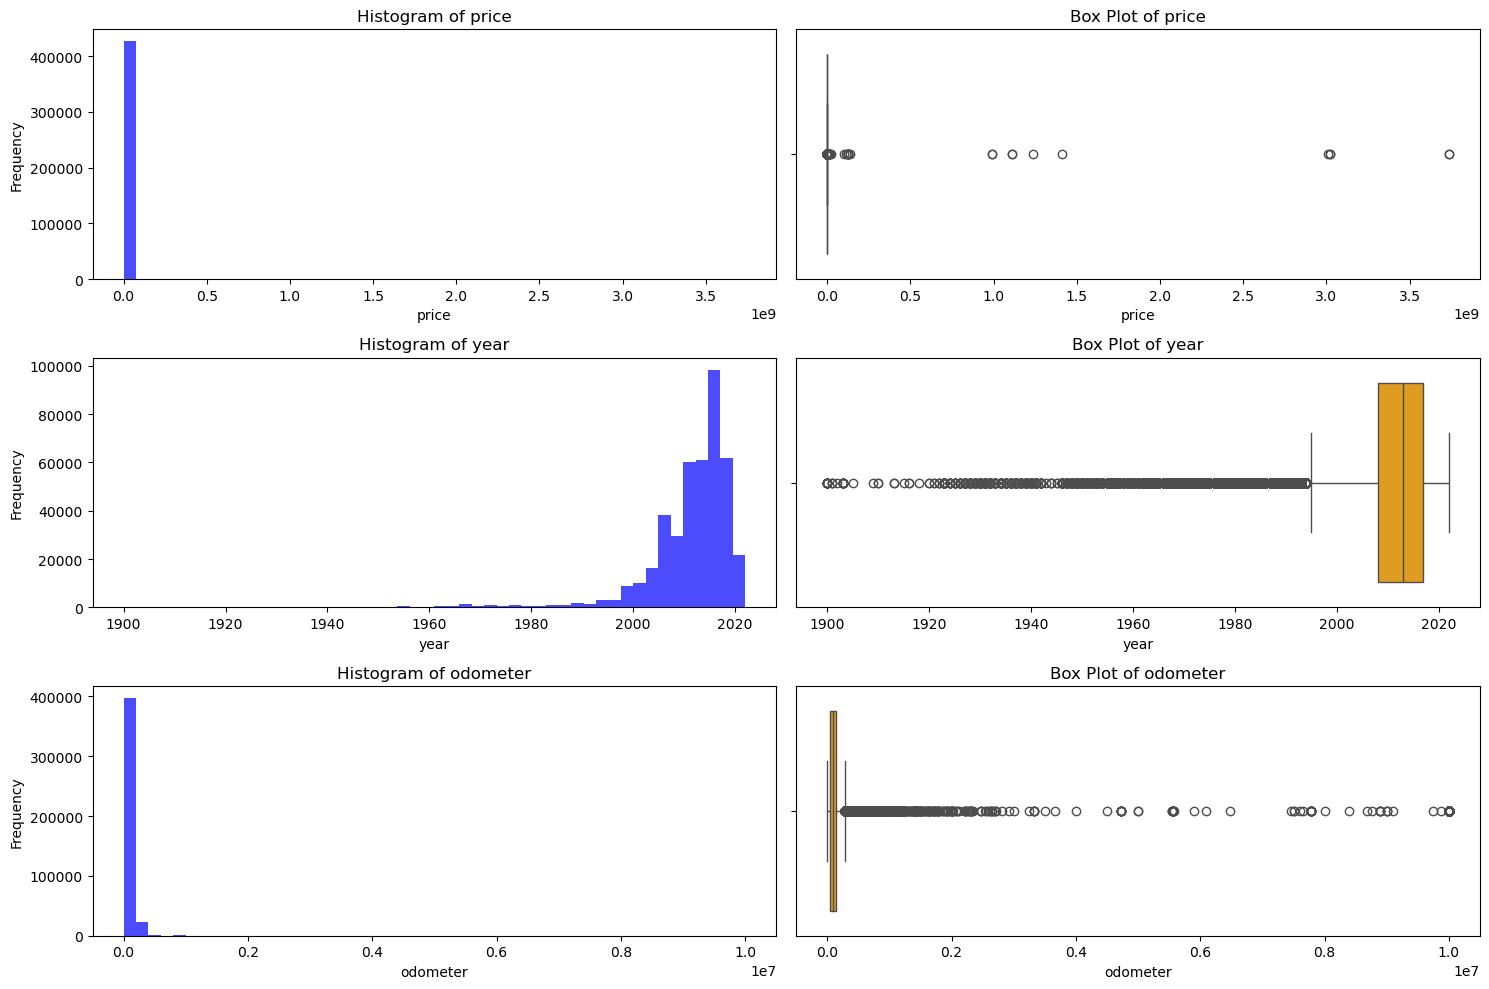

In [25]:
# Select relevant numerical columns for analysis
numerical_columns = ["price", "year", "odometer"]

# Set up the figure size
plt.figure(figsize=(15, 10))

# Create histograms
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 2, 2 * i + 1)
    plt.hist(cars_df[col].dropna(), bins=50, color='blue', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Create box plots
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 2, 2 * i + 2)
    sns.boxplot(x=cars_df[col], color='orange')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

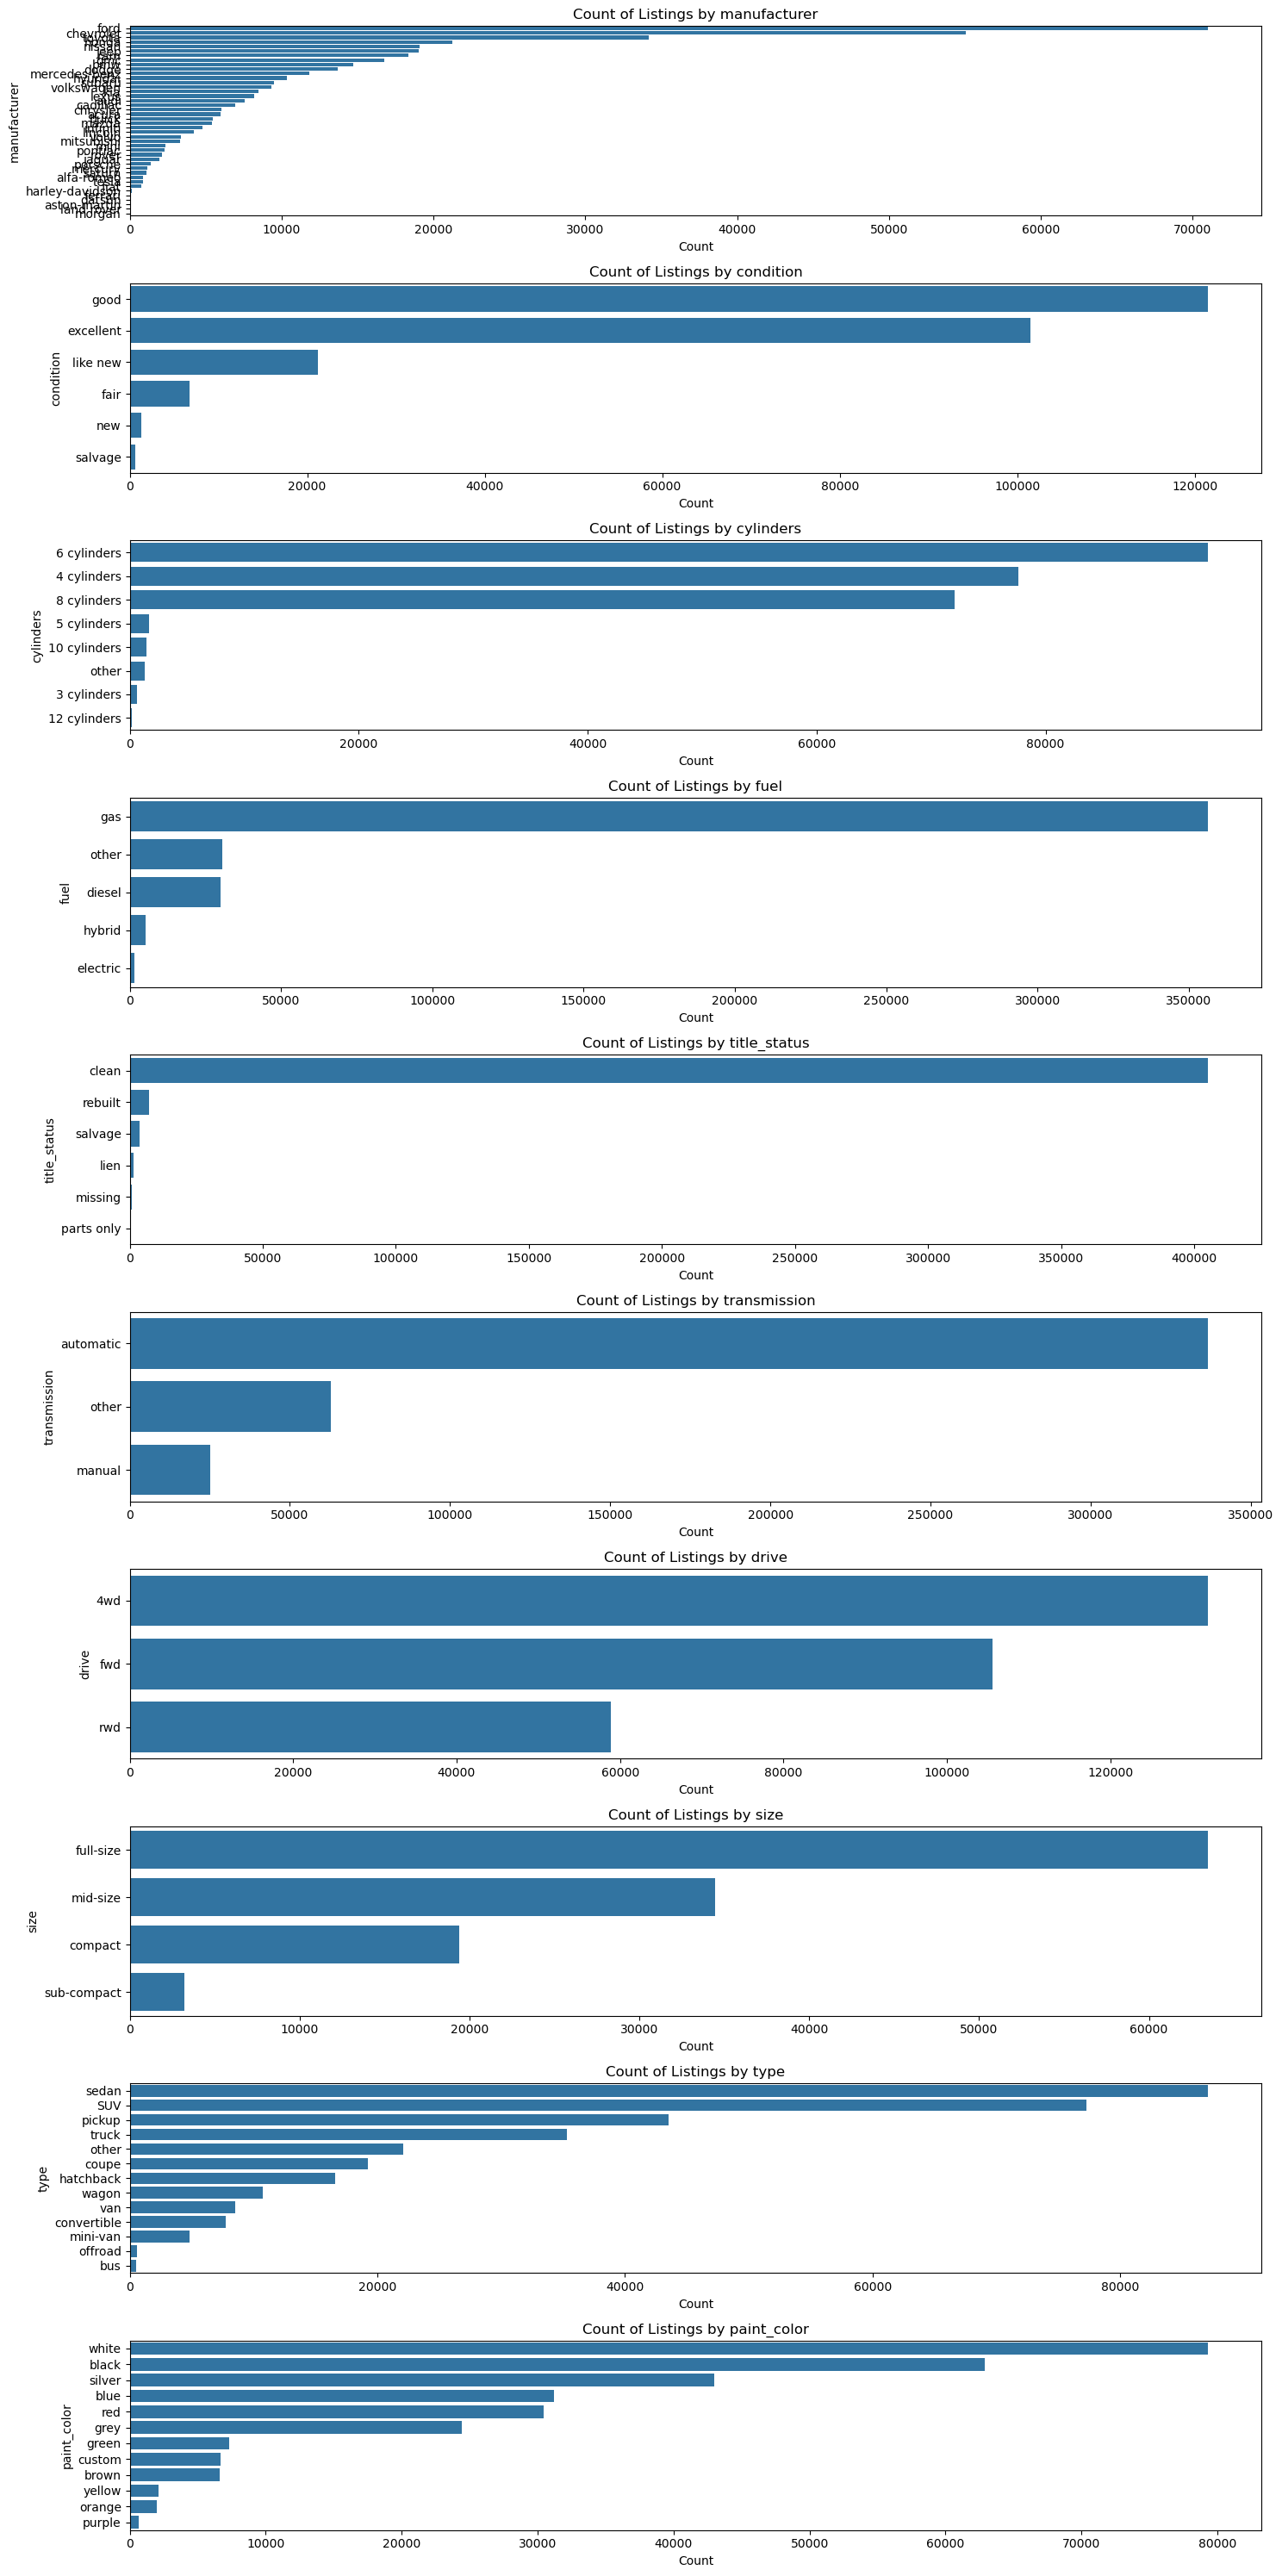

In [27]:
# Identify categorical columns (excluding state, region, and VIN for better visualization)
categorical_columns = ["manufacturer", "condition", "cylinders", 
                       "fuel", "title_status", "transmission", "drive", 
                       "size", "type", "paint_color"]

# Set up subplots for bar plots
plt.figure(figsize=(15, 30))
for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i + 1)
    sns.countplot(y=cars_df[col], order=cars_df[col].value_counts().index)
    plt.title(f'Count of Listings by {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

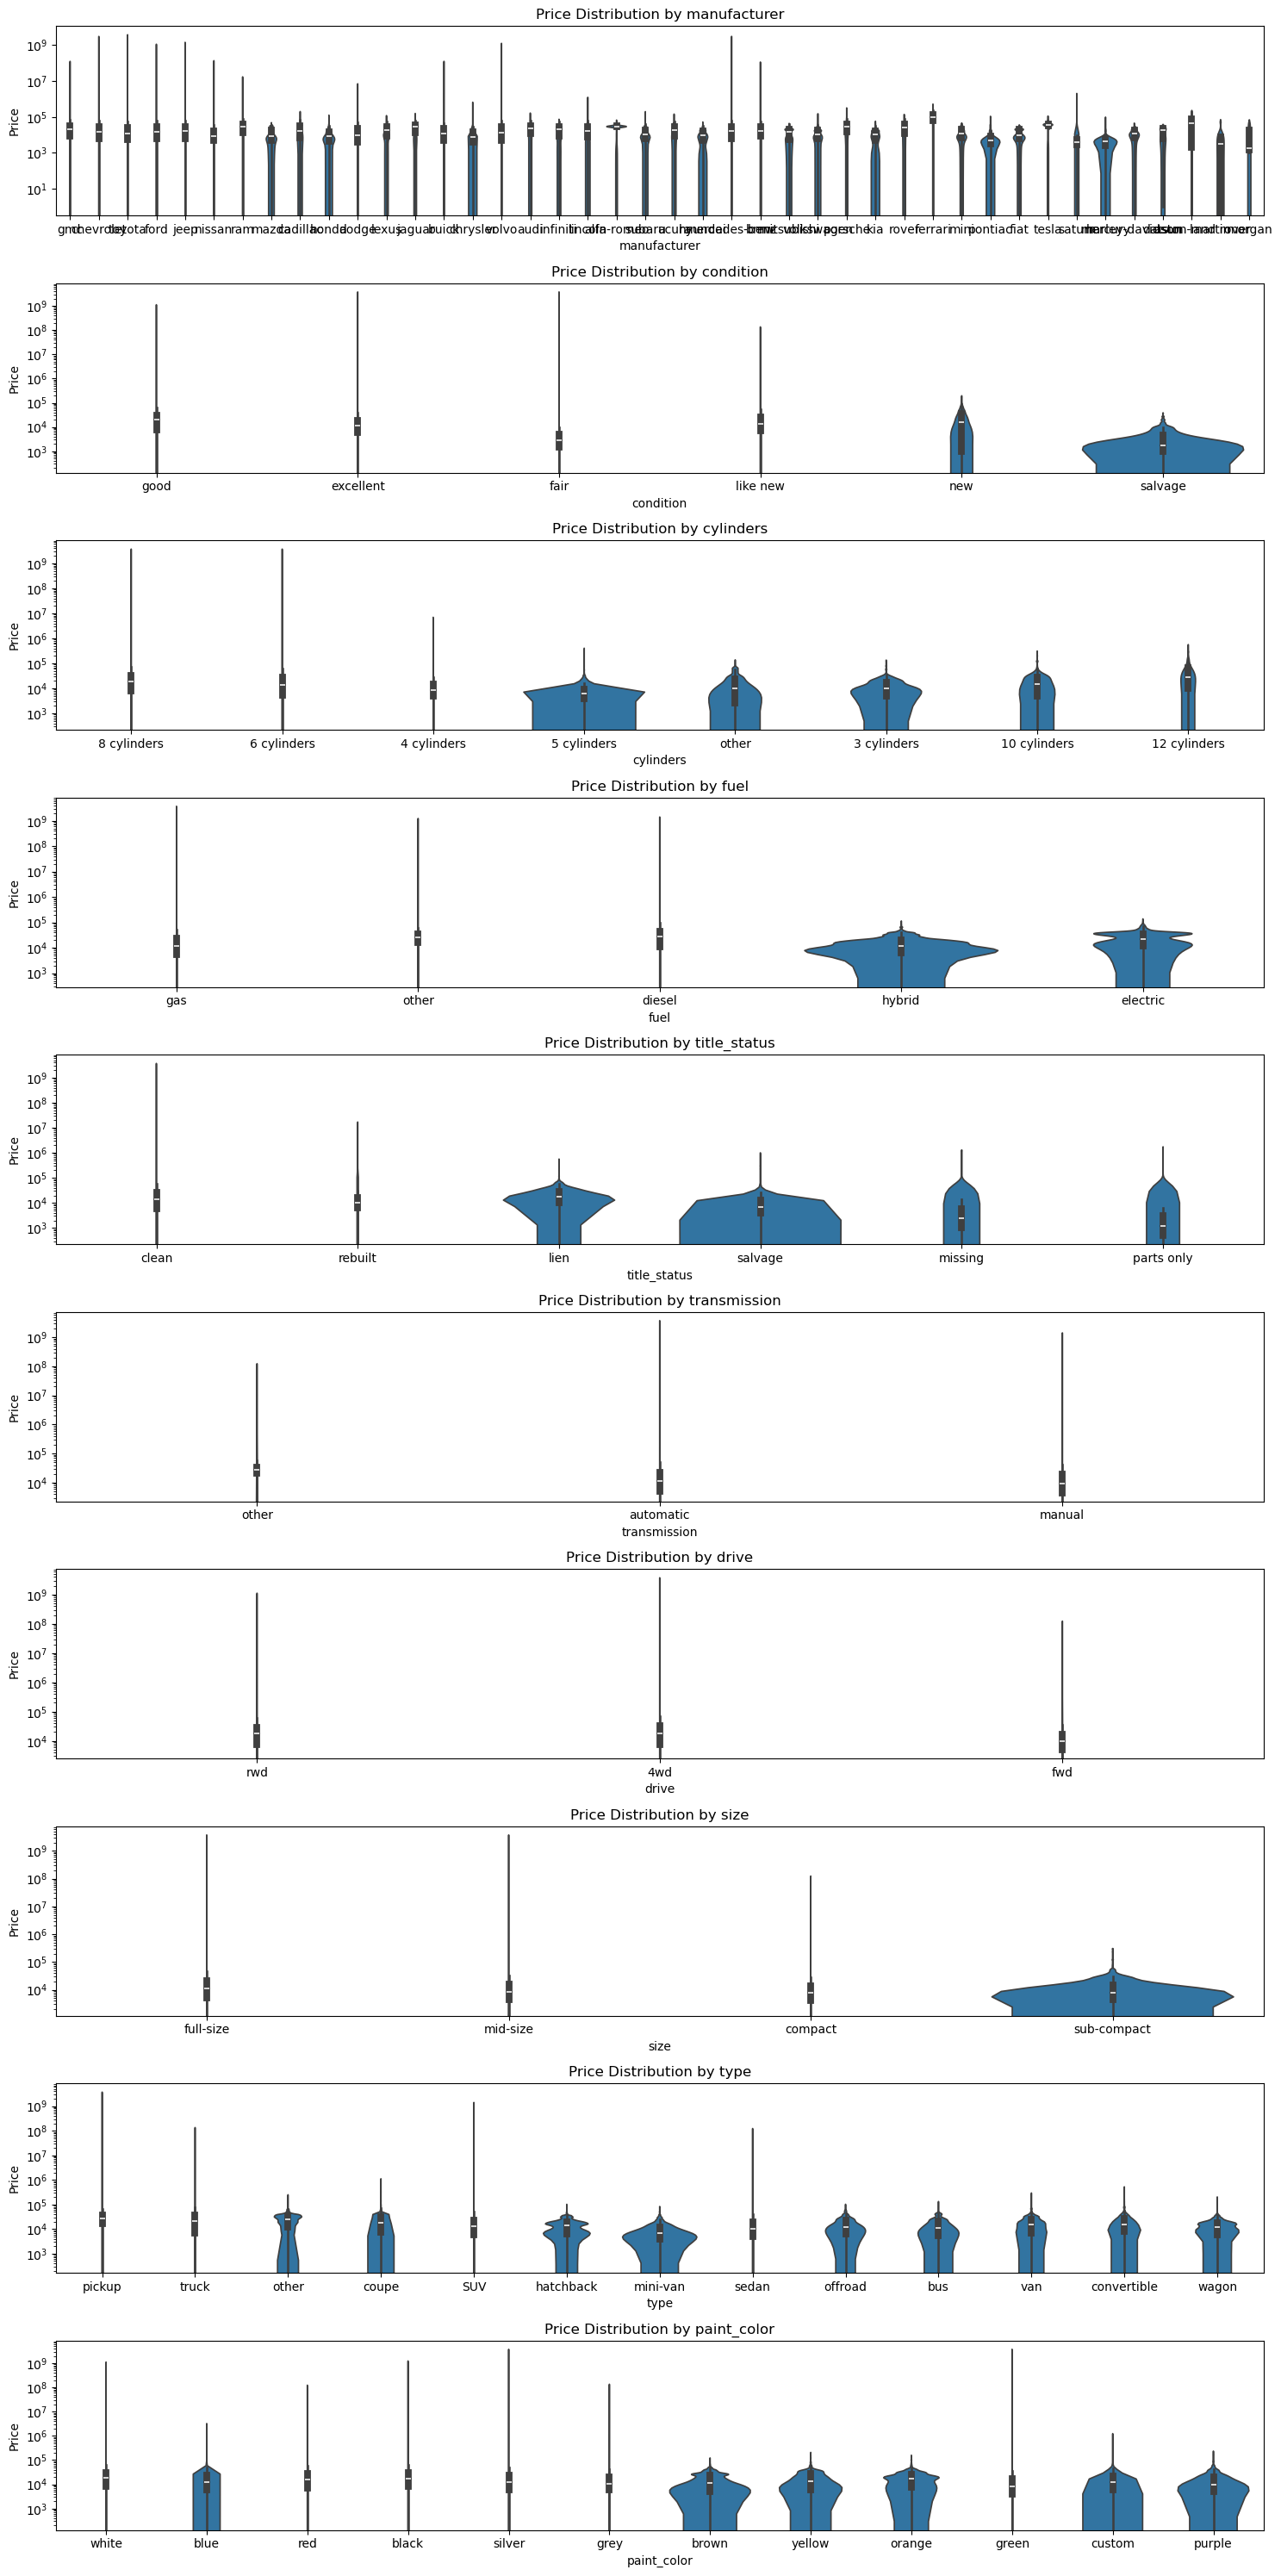

In [29]:
# Set up subplots for violin plots
plt.figure(figsize=(15, 30))
for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i + 1)
    sns.violinplot(x=cars_df[col], y=cars_df["price"], data=cars_df)
    plt.title(f'Price Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.yscale('log')  # Log scale to handle outliers

plt.tight_layout()
plt.show()

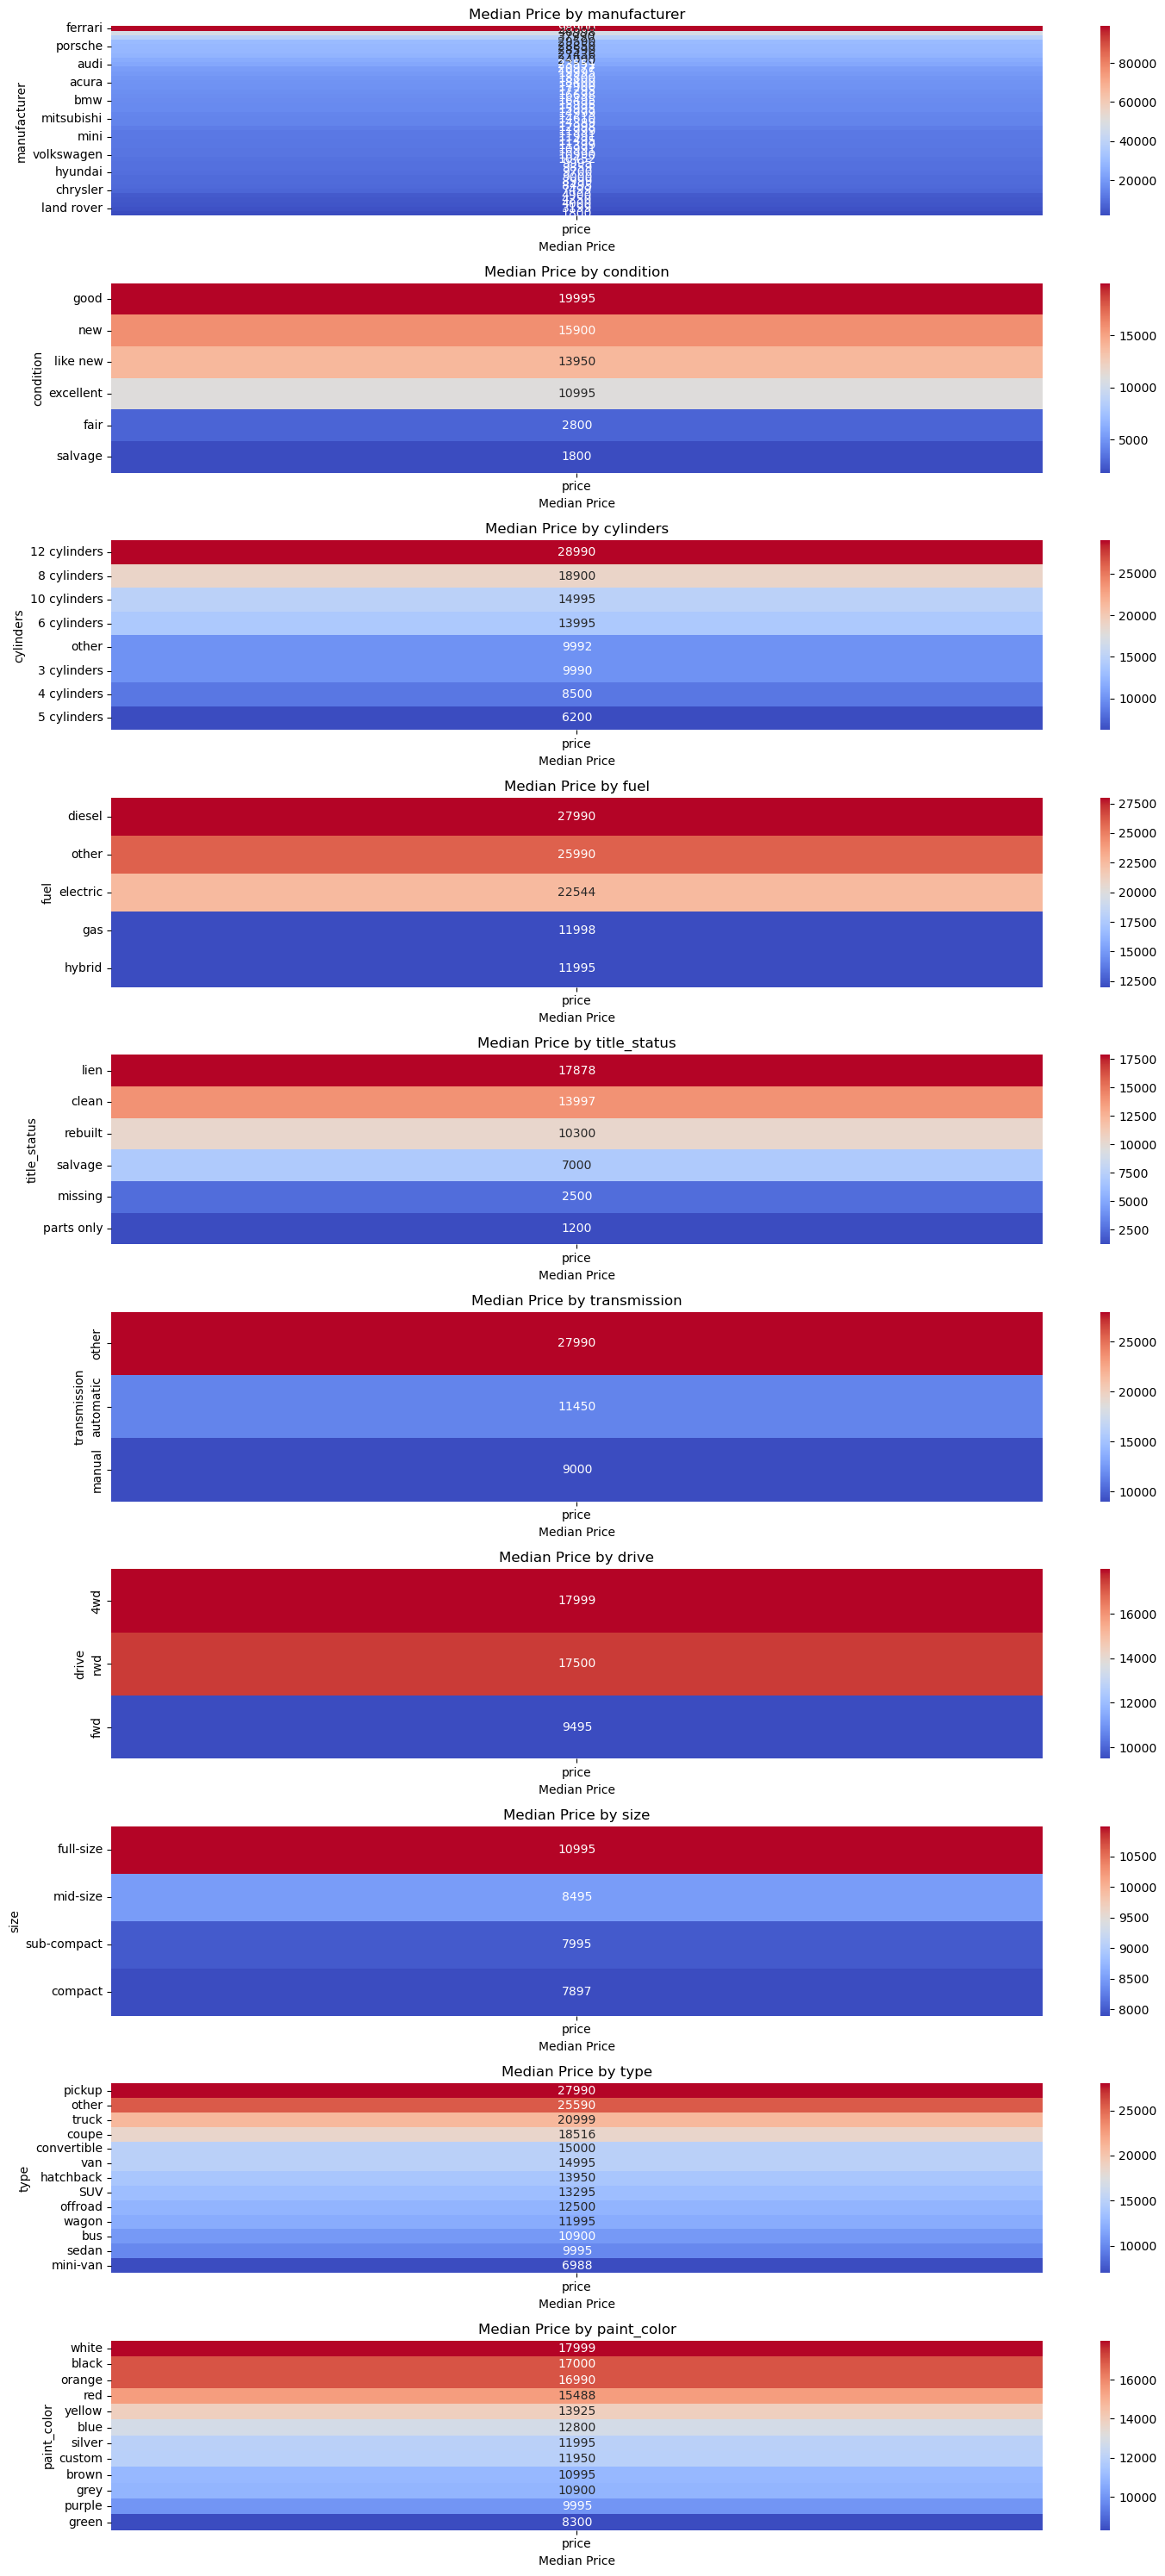

In [31]:
# Set up subplots for heatmaps
plt.figure(figsize=(15, 30))
for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i + 1)
    
    # Create pivot table with median price per category
    pivot_table = cars_df.pivot_table(index=col, values="price", aggfunc="median")
    
    # Generate heatmap
    sns.heatmap(pivot_table.sort_values(by="price", ascending=False), cmap="coolwarm", annot=True, fmt=".0f")
    plt.title(f'Median Price by {col}')
    plt.ylabel(col)
    plt.xlabel('Median Price')

plt.tight_layout()
plt.show()

### Lastly I'll investigate the unique values for each column

In [33]:
cars_df['state'].unique()

<StringArray>
['az', 'ar', 'fl', 'ma', 'nc', 'ny', 'or', 'pa', 'tx', 'wa', 'wi', 'al', 'ak',
 'ca', 'co', 'ct', 'dc', 'de', 'ga', 'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky',
 'la', 'me', 'md', 'mi', 'mn', 'ms', 'mo', 'mt', 'ne', 'nv', 'nj', 'nm', 'nh',
 'nd', 'oh', 'ok', 'ri', 'sc', 'sd', 'tn', 'ut', 'vt', 'va', 'wv', 'wy']
Length: 51, dtype: string

In [35]:
cars_df['region'].unique()

<StringArray>
[              'prescott',           'fayetteville',           'florida keys',
 'worcester / central MA',             'greensboro',          'hudson valley',
        'medford-ashland',                   'erie',                'el paso',
             'bellingham',
 ...
             'eau claire',              'green bay',             'janesville',
         'kenosha-racine',                'madison',              'milwaukee',
            'northern WI',              'sheboygan',                 'wausau',
                'wyoming']
Length: 404, dtype: string

In [37]:
cars_df['transmission'].unique()

<StringArray>
[<NA>, 'other', 'automatic', 'manual']
Length: 4, dtype: string

In [39]:
cars_df['fuel'].unique()

<StringArray>
[<NA>, 'gas', 'other', 'diesel', 'hybrid', 'electric']
Length: 6, dtype: string

In [41]:
cars_df['model'].unique()

<StringArray>
[                            <NA>,       'sierra 1500 crew cab slt',
                 'silverado 1500',            'silverado 1500 crew',
           'tundra double cab sr',                      'f-150 xlt',
    'sierra 2500 hd extended cab',          'silverado 1500 double',
                         'tacoma',          'colorado extended cab',
 ...
                     'cruze, 2lt',                        '2500 ls',
 'Thunder Creek Fuel Trailer MT2',                       '1500 z71',
                   'cj 3a willys',                  'rx& gls sport',
                            'ATI',                  'gand wagoneer',
                    '96 Suburban',        'Paige Glenbrook Touring']
Length: 29650, dtype: string

In [43]:
cars_df['title_status'].unique()

<StringArray>
[<NA>, 'clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only']
Length: 7, dtype: string

In [45]:
cars_df['manufacturer'].unique()

<StringArray>
[             <NA>,             'gmc',       'chevrolet',          'toyota',
            'ford',            'jeep',          'nissan',             'ram',
           'mazda',        'cadillac',           'honda',           'dodge',
           'lexus',          'jaguar',           'buick',        'chrysler',
           'volvo',            'audi',        'infiniti',         'lincoln',
      'alfa-romeo',          'subaru',           'acura',         'hyundai',
   'mercedes-benz',             'bmw',      'mitsubishi',      'volkswagen',
         'porsche',             'kia',           'rover',         'ferrari',
            'mini',         'pontiac',            'fiat',           'tesla',
          'saturn',         'mercury', 'harley-davidson',          'datsun',
    'aston-martin',      'land rover',          'morgan']
Length: 43, dtype: string

In [47]:
cars_df['type'].unique()

<StringArray>
[         <NA>,      'pickup',       'truck',       'other',       'coupe',
         'SUV',   'hatchback',    'mini-van',       'sedan',     'offroad',
         'bus',         'van', 'convertible',       'wagon']
Length: 14, dtype: string

In [49]:
cars_df['paint_color'].unique()

<StringArray>
[    <NA>,  'white',   'blue',    'red',  'black', 'silver',   'grey',
  'brown', 'yellow', 'orange',  'green', 'custom', 'purple']
Length: 13, dtype: string

In [51]:
cars_df['drive'].unique()

<StringArray>
[<NA>, 'rwd', '4wd', 'fwd']
Length: 4, dtype: string

In [53]:
cars_df['condition'].unique()

<StringArray>
[<NA>, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage']
Length: 7, dtype: string

In [55]:
cars_df['cylinders'].unique()

<StringArray>
[          <NA>,  '8 cylinders',  '6 cylinders',  '4 cylinders',
  '5 cylinders',        'other',  '3 cylinders', '10 cylinders',
 '12 cylinders']
Length: 9, dtype: string

In [57]:
cars_df['size'].unique()

<StringArray>
[<NA>, 'full-size', 'mid-size', 'compact', 'sub-compact']
Length: 5, dtype: string

## Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### First I'll drop columns from the data set with over 50% missing values and values that do not seem relevant

In [59]:
# Drop the specified columns
cars_df = cars_df.drop(columns=['id', 'VIN', 'size', 'region', 'model'])

print(cars_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         426880 non-null  Int64 
 1   year          425675 non-null  Int64 
 2   manufacturer  409234 non-null  string
 3   condition     252776 non-null  string
 4   cylinders     249202 non-null  string
 5   fuel          423867 non-null  string
 6   odometer      422480 non-null  Int64 
 7   title_status  418638 non-null  string
 8   transmission  424324 non-null  string
 9   drive         296313 non-null  string
 10  type          334022 non-null  string
 11  paint_color   296677 non-null  string
 12  state         426880 non-null  string
dtypes: Int64(3), string(10)
memory usage: 43.6 MB
None


### Then I'll focus on filling in missing values with simple, iterative and KNN imputation

In [62]:
# Check for pd.NA in the dataframe
print(cars_df.isna().sum())  # Counts NaN (np.nan and pd.NA)
print(cars_df.dtypes)  # Check data types to see if any columns are 'object' or 'category'

price                0
year              1205
manufacturer     17646
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
paint_color     130203
state                0
dtype: int64
price                    Int64
year                     Int64
manufacturer    string[python]
condition       string[python]
cylinders       string[python]
fuel            string[python]
odometer                 Int64
title_status    string[python]
transmission    string[python]
drive           string[python]
type            string[python]
paint_color     string[python]
state           string[python]
dtype: object


In [64]:
# Ensure all missing values are np.nan
cars_df = cars_df.astype(object).where(cars_df.notna(), np.nan)

In [66]:
# Ensure text columns are treated as strings
for col in ["cylinders", "condition", "drive", "manufacturer", "title_status", "fuel", "transmission"]:
    cars_df[col] = cars_df[col].astype(str)  

In [68]:
# Run simple imputer on the above columns
from sklearn.impute import SimpleImputer

most_frequent_imputer = SimpleImputer(strategy="most_frequent", missing_values=np.nan)

for col in ["cylinders", "condition", "drive", "manufacturer", "title_status", "fuel", "transmission"]:
    cars_df[col] = most_frequent_imputer.fit_transform(cars_df[[col]]).ravel()  # Flatten the array

In [70]:
# Check again on missing values
print(cars_df.isna().sum())

price                0
year              1205
manufacturer         0
condition            0
cylinders            0
fuel                 0
odometer          4400
title_status         0
transmission         0
drive                0
type             92858
paint_color     130203
state                0
dtype: int64


In [72]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Initialize SimpleImputer for Most Frequent or Constant Values
most_frequent_imputer = SimpleImputer(strategy="most_frequent", missing_values=np.nan)
unknown_imputer = SimpleImputer(strategy="constant", fill_value="Unknown")

# Ensure compatibility with future Pandas versions
pd.set_option('future.no_silent_downcasting', True)

# Replace pd.NA with pd.nan to ensure the data is properly formatted for imputation
cars_df = cars_df.replace({pd.NA: np.nan})
cars_df = cars_df.infer_objects(copy=False)

# Apply simple imputations
for col in ["cylinders", "condition", "drive", "manufacturer", "title_status", "fuel", "transmission"]:
    cars_df[col] = most_frequent_imputer.fit_transform(cars_df[[col]]).ravel()

for col in ["paint_color", "type", "condition"]:
    cars_df[col] = unknown_imputer.fit_transform(cars_df[[col]]).ravel()

# Convert year to integer to resolve errors
cars_df["year"] = pd.to_numeric(cars_df["year"], errors="coerce").round().astype("Int64")

# Apply Iterative Imputer for Continuous Variables
iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10), max_iter=50, random_state=42)
cars_df[['odometer', 'year']] = iterative_imputer.fit_transform(cars_df[['odometer', 'year']])

# Convert `drive` column from categorical to numeric before applying KNNImputer
cars_df["drive"] = cars_df["drive"].astype("category").cat.codes

# Apply KNN Imputer only on numerical drive
knn_imputer = KNNImputer(n_neighbors=5)
cars_df[['drive']] = knn_imputer.fit_transform(cars_df[['drive']].astype(float))

# Final Check: Ensure no missing values remain
print(cars_df.isnull().sum())

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64


/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [73]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          426880 non-null  float64
 2   manufacturer  426880 non-null  object 
 3   condition     426880 non-null  object 
 4   cylinders     426880 non-null  object 
 5   fuel          426880 non-null  object 
 6   odometer      426880 non-null  float64
 7   title_status  426880 non-null  object 
 8   transmission  426880 non-null  object 
 9   drive         426880 non-null  float64
 10  type          426880 non-null  object 
 11  paint_color   426880 non-null  object 
 12  state         426880 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 42.3+ MB


### Now I'll deal with the columns that have a high number of 0 values

In [76]:
# investigate the number of records with values 0 in the data set

cars_df.eq(0).sum()

price            32895
year                 0
manufacturer         0
condition            0
cylinders            0
fuel                 0
odometer          1965
title_status         0
transmission         0
drive           131904
type                 0
paint_color          0
state                0
dtype: int64

I believe the instances of $0 for price are data entry mistakes or missing values. For odometer I'll want to check the year of the car to see if it might be new to explain the 0 mileage value, otherwise I'll assume it's also a missing value. Then for the drive column, since it's categorical I'll assume 0 means "unknown".

In [78]:
# Replace zero values in price with NaN
cars_df['price'] = cars_df['price'].replace(0, np.nan)

# Fill NaN values in price with the median price
cars_df['price'] = cars_df['price'].fillna(cars_df['price'].median())

In [80]:
# Compute mileage per year
cars_df['mileage_per_year'] = cars_df['odometer'] / (2024 - cars_df['year'])

# Replace zeros with NaN
cars_df['mileage_per_year'] = cars_df['mileage_per_year'].replace(0, np.nan)

# Fill NaN values using median mileage per year for similar car manufacturers
cars_df['mileage_per_year'] = cars_df['mileage_per_year'].fillna(
    cars_df.groupby('manufacturer')['mileage_per_year'].transform('median')
)

In [82]:
# Replace zeros with "Unknown" for drive column
cars_df['drive'] = cars_df['drive'].replace(0, "Unknown")

In [84]:
# Re-investigate the number of records with values 0 in the data set

cars_df.eq(0).sum()

price                  0
year                   0
manufacturer           0
condition              0
cylinders              0
fuel                   0
odometer            1965
title_status           0
transmission           0
drive                  0
type                   0
paint_color            0
state                  0
mileage_per_year       0
dtype: int64

In [86]:
# Re-check for missing values

missing_counts = cars_df.isnull().sum().sort_values()
print(missing_counts)

price               0
year                0
manufacturer        0
condition           0
cylinders           0
fuel                0
odometer            0
title_status        0
transmission        0
drive               0
type                0
paint_color         0
state               0
mileage_per_year    0
dtype: int64


### Next I'll set a cap for the price and odometer columns to address the extreme outliers that are likely incorrect

In [88]:
from sklearn.preprocessing import LabelEncoder

# Set thresholds for each column
price_cap = 250000  # Cap prices above $250K
odometer_cap = 500000  # Cap odometer above 500K miles

# Apply caps
cars_df['price'] = np.where(cars_df['price'] > price_cap, price_cap, cars_df['price'])
cars_df['odometer'] = np.where(cars_df['odometer'] > odometer_cap, odometer_cap, cars_df['odometer'])

# Remove zero or extremely low price entries
cars_df = cars_df[cars_df['price'] > 500]  # Ensure minimum price is reasonable (e.g., $500)

### As a final data preparation step I'll use label and target encoding on the categorical variables

In [90]:
# Label Encode low-cardinality categorical columns
label_encoder = LabelEncoder()
for col in ['cylinders', 'fuel', 'transmission', 'drive', 'title_status']:
    cars_df[col] = label_encoder.fit_transform(cars_df[col].astype(str))  # Convert to string before encoding

# Target Eecoding for high-cardinality categorical columns
high_cardinality_cols = ['manufacturer', 'type', 'paint_color', 'state']
for col in high_cardinality_cols:
    cars_df[col] = cars_df.groupby(col)['price'].transform('mean')  # Replace category with its mean price

# Display final structure
print(cars_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 416660 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   price             416660 non-null  float64
 1   year              416660 non-null  float64
 2   manufacturer      416660 non-null  float64
 3   condition         416660 non-null  object 
 4   cylinders         416660 non-null  int64  
 5   fuel              416660 non-null  int64  
 6   odometer          416660 non-null  float64
 7   title_status      416660 non-null  int64  
 8   transmission      416660 non-null  int64  
 9   drive             416660 non-null  int64  
 10  type              416660 non-null  float64
 11  paint_color       416660 non-null  float64
 12  state             416660 non-null  float64
 13  mileage_per_year  416660 non-null  float64
dtypes: float64(8), int64(5), object(1)
memory usage: 47.7+ MB
None


In [92]:
# Condition still had missing values, I'll replace those with "unknown" and re-encode the column

# Replace string "nan" with actual NaN values
cars_df['condition'] = cars_df['condition'].replace("nan", np.nan)

# Assign transformed column back instead of using inplace=True
cars_df['condition'] = cars_df['condition'].fillna("unknown")

# Convert to categorical codes
cars_df['condition'] = cars_df['condition'].astype('category').cat.codes

In [94]:
# Should now show 0 missing values
print(cars_df.isna().sum())

price               0
year                0
manufacturer        0
condition           0
cylinders           0
fuel                0
odometer            0
title_status        0
transmission        0
drive               0
type                0
paint_color         0
state               0
mileage_per_year    0
dtype: int64


In [96]:
# Save the optimized dataset
cars_df.to_csv("data/final_vehicles.csv", index=False)

## Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Standard linear regression model

In [98]:
# read in the optimized dataset

cars_model_df = pd.read_csv('data/final_vehicles.csv')

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = cars_model_df.drop(columns=["price"])  # Drop the target column
y = cars_model_df["price"]  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 7116.212277141409
Root Mean Squared Error (RMSE): 11272.607233549155
R-squared (R2): 0.41401604179767704


These high RMSE and MAE values indicate the predictions deviate significantly from the actual values.

To find ways to improve the model I'll check for feature corelation.

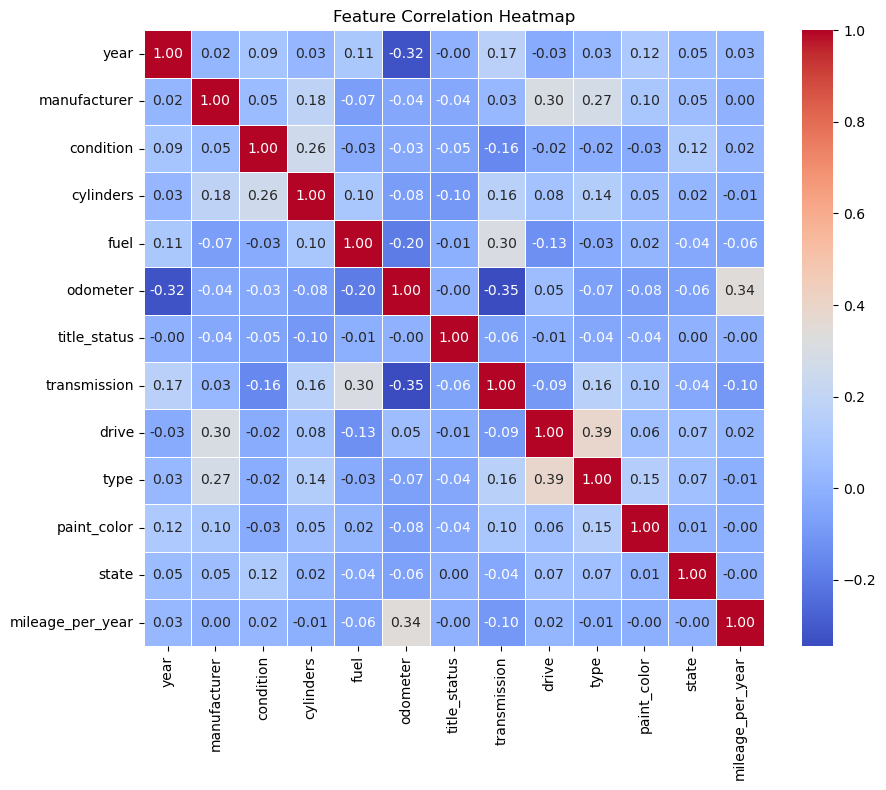

In [102]:
# Compute correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig("feature_correlation_heatmap.png")
plt.show()

There appears to not be any highly correlated features, so multicollinearity does not seem to be a concern for the model.

Next I'll try a log transformation on price to make it more normally distributed.

In [104]:
# Apply log transformation
cars_model_df["log_price"] = np.log(cars_model_df["price"])

# Use log_price as target
X = cars_model_df.drop(columns=["price", "log_price"])  # Keep only log-transformed price
y = cars_model_df["log_price"]  # Target is now log(price)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.41715782188127737
Root Mean Squared Error (RMSE): 0.621851509713162
R-squared (R2): 0.4681699023537098


The RMSE is significantly lower than the initial run of the model, the log transofrmation appeared to improve the performance likely due to the price having a heavily skewed distribution.

Next I'll try a few other types of models.

### Lasso Regression for Feature Selection

In [106]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Lasso model
lasso = Lasso(alpha=0.1)  # Adjust alpha to control regularization strength
lasso.fit(X_train, y_train)

# Print number of features kept
print(f"Number of features used: {sum(lasso.coef_ != 0)}")

# Evaluate Lasso model
y_pred = lasso.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred)
print(f"Lasso R-squared: {lasso_r2}")

Number of features used: 9
Lasso R-squared: 0.43414435453434286


Reducing the number of features to 9 simplifies the model and possibly reduces overfitting but appears to have also slightly reduced performance.

### Ridge Regression Model

In [108]:
from sklearn.linear_model import Ridge

# Train Ridge model
ridge = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge.fit(X_train, y_train)

# Evaluate Ridge model
y_pred = ridge.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred)
print(f"Ridge R-squared: {ridge_r2}")

Ridge R-squared: 0.4681699001337032


Ridge regression has the same performance as the standard linear regression model but seemed to outperform Lasso while retaining all features.

This might mean that Lasso was too aggressive, and since the R2 was the same as standard linear regression that regularization isn't necessary. The dataset might be better suited for non-linear models so I'll try that next.

### Polynomial Regression

In [110]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Train Polynomial Regression model (degree=2 for quadratic relationships)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

# Evaluate Polynomial Regression model
y_pred = poly_model.predict(X_test)
poly_r2 = r2_score(y_test, y_pred)
print(f"Polynomial Regression R-squared: {poly_r2}")

Polynomial Regression R-squared: 0.47734098619836274


In [112]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Train Polynomial Regression model (degree=3 for quadratic relationships)
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(X_train, y_train)

# Evaluate Polynomial Regression model
y_pred = poly_model.predict(X_test)
poly_r2 = r2_score(y_test, y_pred)
print(f"Polynomial Regression R-squared: {poly_r2}")

Polynomial Regression R-squared: -54.8733792363995


The R-squared of 0.4773 is an improvement over the Linear Regression model suggesting non-linearity in the data.

The Degree=3 model performed horribly indicating severe overfitting due to the model being too complex.

## Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### I believe there are multiple insights that we can infer from this model to determine the drivers of used car prices

Here are some insights with corresponding visuals.

First I'll define mapping dictionaries to better label the plots.

In [115]:
# Define mapping dictionaries
drive_mapping = {1: "FWD", 2: "RWD", 3: "AWD"}
fuel_mapping = {1: "Gas", 2: "Diesel", 3: "Electric", 4: "Hybrid", 5: "Other"}
transmission_mapping = {1: "Automatic", 2: "Manual", 3: "CVT"}
type_mapping = {1: "Sedan", 2: "SUV", 3: "Truck", 4: "Coupe", 5: "Convertible", 
                6: "Van", 7: "Wagon", 8: "Hatchback", 9: "Other"}
condition_mapping = {1: "New", 2: "Like New", 3: "Excellent", 4: "Good", 5: "Fair", 6: "Salvage"}
manufacturer_mapping = {1: "Ford", 2: "Chevrolet", 3: "Toyota", 4: "Honda", 5: "Nissan",
                        6: "Jeep", 7: "Dodge", 8: "BMW", 9: "Mercedes-Benz", 10: "Volkswagen",
                        11: "Hyundai", 12: "Subaru", 13: "Kia", 14: "Lexus", 15: "Mazda",
                        16: "Ram", 17: "Cadillac", 18: "Buick", 19: "GMC", 20: "Chrysler",
                        21: "Audi", 22: "Infiniti", 23: "Acura", 24: "Lincoln", 25: "Volvo",
                        26: "Mini", 27: "Fiat", 28: "Porsche", 29: "Mitsubishi", 30: "Other"}

# Ensure the columns are converted to object (string-friendly) before applying map()
cars_model_df["drive"] = cars_model_df["drive"].astype("object").map(drive_mapping)
cars_model_df["fuel"] = cars_model_df["fuel"].astype("object").map(fuel_mapping)
cars_model_df["transmission"] = cars_model_df["transmission"].astype("object").map(transmission_mapping)
cars_model_df["type"] = cars_model_df["type"].astype("object").map(type_mapping)
cars_model_df["condition"] = cars_model_df["condition"].astype("object").map(condition_mapping)
cars_model_df["manufacturer"] = cars_model_df["manufacturer"].astype("object").map(manufacturer_mapping)

# Display a sample of the updated dataframe
print(cars_model_df[["drive", "fuel", "transmission", "type", "condition", "manufacturer"]].head())

  drive    fuel transmission type condition manufacturer
0   FWD  Hybrid       Manual  NaN   Salvage          NaN
1   FWD  Hybrid       Manual  NaN   Salvage          NaN
2   FWD  Hybrid       Manual  NaN   Salvage          NaN
3   FWD  Hybrid       Manual  NaN   Salvage          NaN
4   FWD  Hybrid       Manual  NaN   Salvage          NaN


### 1. Cars lose value quickly in the first few years, then deprectiation slows

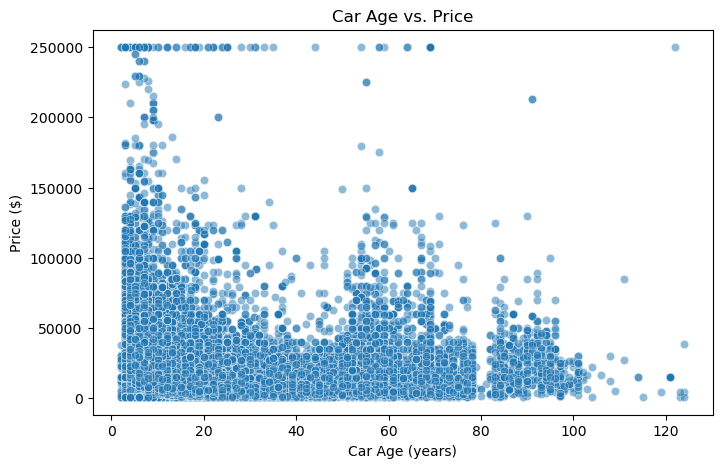

In [123]:
# Create a new 'age' feature
cars_model_df["age"] = 2024 - cars_model_df["year"]

# Scatter plot of Age vs. Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=cars_model_df["age"], y=cars_model_df["price"], alpha=0.5)
plt.title("Car Age vs. Price")
plt.xlabel("Car Age (years)")
plt.ylabel("Price ($)")
plt.show()

### 2. Higher milage odometer readings generally leads to lower price, but not always linearly

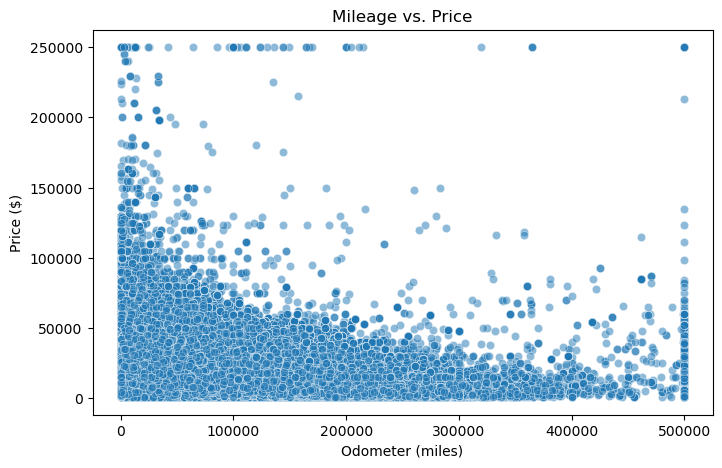

In [125]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=cars_model_df["odometer"], y=cars_model_df["price"], alpha=0.5)
plt.title("Mileage vs. Price")
plt.xlabel("Odometer (miles)")
plt.ylabel("Price ($)")
plt.show()

### 3. Better condition cars are priced higher

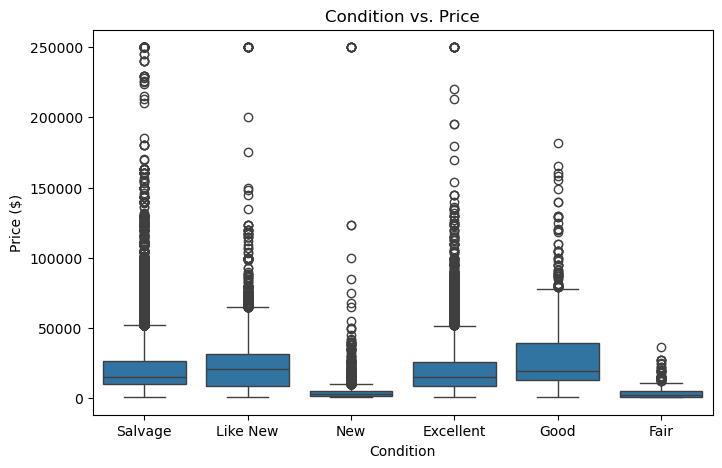

In [127]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=cars_model_df["condition"], y=cars_model_df["price"])
plt.title("Condition vs. Price")
plt.xlabel("Condition")
plt.ylabel("Price ($)")
plt.show()

### 4. AWD and RWD drive types on cars may hold value better in certain regions

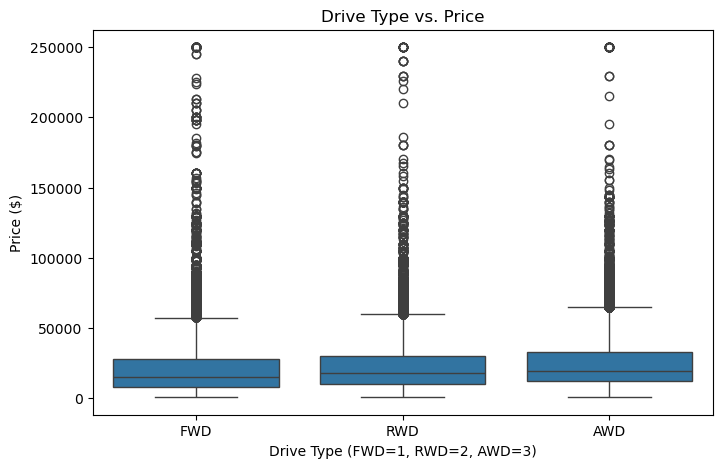

In [135]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=cars_model_df["drive"], y=cars_model_df["price"])
plt.title("Drive Type vs. Price")
plt.xlabel("Drive Type (FWD=1, RWD=2, AWD=3)")
plt.ylabel("Price ($)")
plt.show()

### 5. Automatic cars tend to be priced higher than manuals

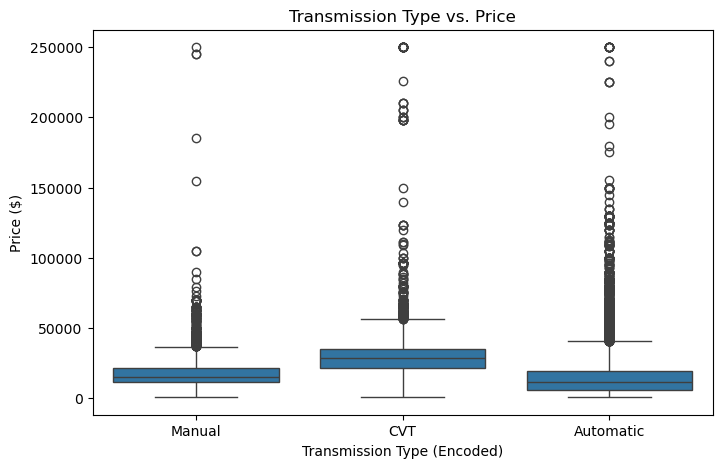

In [139]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=cars_model_df["transmission"], y=cars_model_df["price"])
plt.title("Transmission Type vs. Price")
plt.xlabel("Transmission Type (Encoded)")
plt.ylabel("Price ($)")
plt.show()

### 6. Electric and hybrid vehicles might depreciate differently than gas cars

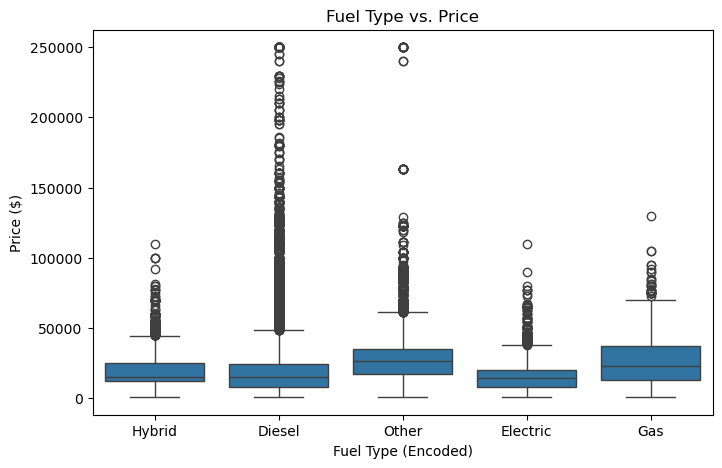

In [141]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=cars_model_df["fuel"], y=cars_model_df["price"])
plt.title("Fuel Type vs. Price")
plt.xlabel("Fuel Type (Encoded)")
plt.ylabel("Price ($)")
plt.show()

## Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

### See GitHub Readme for the report to give to the client